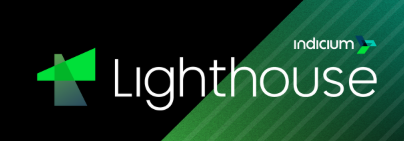

# Desafio Técnico - LH_CD_LUCELIA (Ciência de Dados)

# 🎬 Análise Exploratória (EDA) - Dataset IMDB

Este notebook contém a etapa de **exploração, limpeza e análise descritiva** do dataset IMDB.

---

## 📌 Sumário
1. [Importação de bibliotecas](#1)
2. [Carregando os dados original](#2)
3. [Limpeza e pré-processamento inicial](#3)
4. [Qualidade dos dados](#4)
5. [Análise univariada](#5)
6. [Análise bivariada](#6)
7. [Análise temporal](#7)
8. [Insights Texto (Overview)](#8)
9. [Atores, Diretores e Gênero](#9)
10. [Exportação dos dados tratados](#10)
11. [Respostas do Desafio- Passo 2](#11)


## 1. [Importação de bibliotecas](#1)

In [1]:
import re
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

## 2. [Carregando os dados original](#2)

In [2]:
df_imdb = pd.read_csv("desafio_indicium_imdb.csv")
print("Formato:", df_imdb.shape)
df_imdb.head(2)

Formato: (999, 16)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


### ➡️Observação: Temos quase 1000 filmes e 15 colunas. Algumas colunas são categorias como: Overview e outras numéricas Runtime, Gross.

## 3. [Limpeza e pré-processamento inicial](#3)

In [3]:
# Remover coluna desnecessária
df_imdb = df_imdb.drop(columns=["Unnamed: 0"], errors="ignore")

# Limpeza de Gross -> remover vírgulas e converter para numérico
if "Gross" in df_imdb.columns:
    df_imdb["Gross"] = pd.to_numeric(df_imdb["Gross"].str.replace(",", ""), errors="coerce")

# Limpeza de Runtime -> remover 'min' e converter para número
if "Runtime" in df_imdb.columns:
    df_imdb["Runtime"] = pd.to_numeric(df_imdb["Runtime"].str.replace("min", ""), errors="coerce")

# Converter Released_Year para numérico
if "Released_Year" in df_imdb.columns:
    df_imdb["Released_Year"] = pd.to_numeric(df_imdb["Released_Year"], errors="coerce").astype("Int64") 

df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    Int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: Int64(1), float64(3), int64(2), object(9)
memory usage: 118.2+ KB


## 4. [Qualidade dos dados](#4)

In [4]:
# Percentual de dados nulos
(df_imdb.isnull().sum() / len(df_imdb) * 100).round(2)

Series_Title      0.00
Released_Year     0.10
Certificate      10.11
Runtime           0.00
Genre             0.00
IMDB_Rating       0.00
Overview          0.00
Meta_score       15.72
Director          0.00
Star1             0.00
Star2             0.00
Star3             0.00
Star4             0.00
No_of_Votes       0.00
Gross            16.92
dtype: float64

In [5]:
# verificando dados duplicados
df_imdb.duplicated().value_counts()

False    999
Name: count, dtype: int64

In [6]:
df_imdb.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.0,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.0,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.0,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.0,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.0,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


## 5. [Análise univariada](#5)

Text(0, 0.5, 'Frequência')

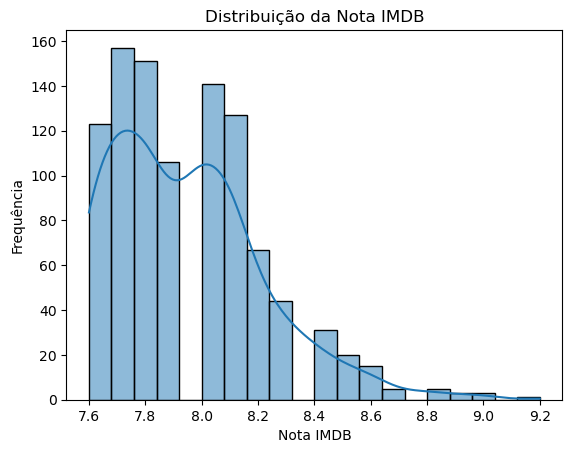

In [7]:
# Histograma da nota IMDB
sns.histplot(df_imdb["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribuição da Nota IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Frequência")

### ➡️ Insight: A distribuição da váriavel Nota IMDB, posui uma assimetria Positiva. O que indica que maioria dos filmes possui notas entre 7 e 8, com poucos acima de 9.

Text(0.5, 1.0, 'Distribuição de Faturamento (Gross)')

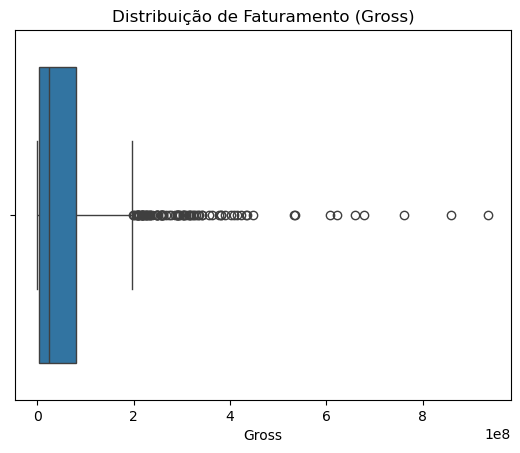

In [8]:
# Boxplot da variável Gross
sns.boxplot(x=df_imdb["Gross"])
plt.title("Distribuição de Faturamento (Gross)")

### ➡️ Observação: Boxplot mostrou que Faturamento (Gross) possui alguns valores atípicos (outliers)

Text(0.5, 1.0, 'Top 10 Gêneros mais frequentes')

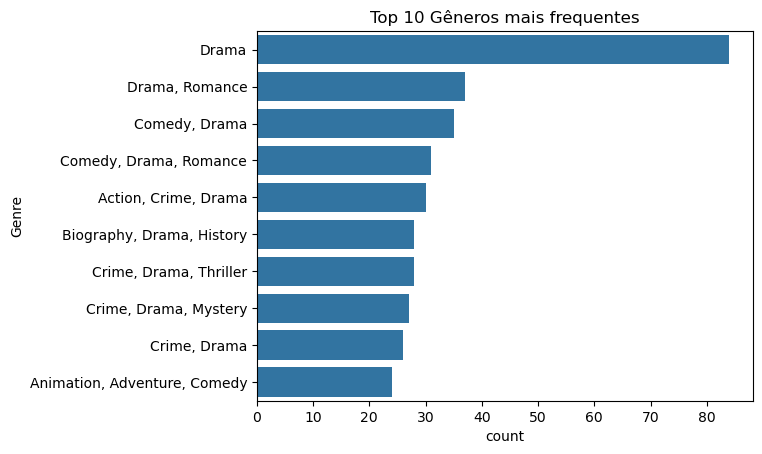

In [9]:
# Contagem dos 10 Top gêneros
sns.countplot(y="Genre", data=df_imdb, order=df_imdb["Genre"].value_counts().index[:10])
plt.title("Top 10 Gêneros mais frequentes")

## ➡️ Insight: O gênero Drama é predominante. Como hipótese esse gênero aparece em grande parte dos filmes porque ele é mais abrangente e costuma se misturar com outros gêneros (Drama + Romance, Drama + Crime). Ou seja a indústria aposta em combinações de gêneros para atrair públicos diferentes.

## 6. [Análise bivariada](#6)

Text(0.5, 1.0, 'Mapa de Correlação')

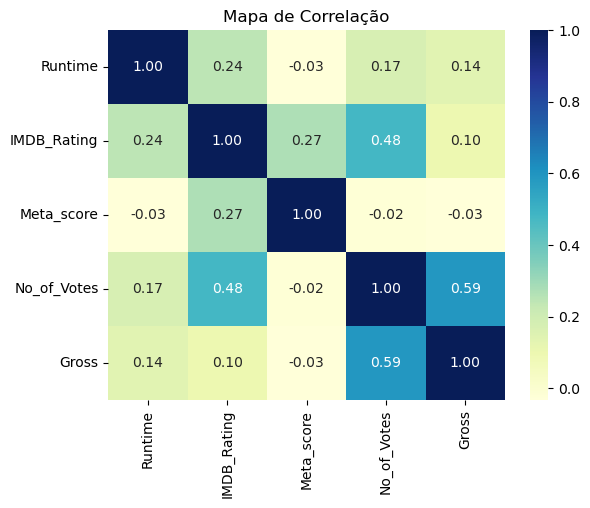

In [10]:
# Selecionar somente colunas numéricas
df_corr = df_imdb[['Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes','Gross']].copy()
sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Correlação")

### ➡️ Observação: Percebe-se que variaveis número de votos (no_of_votes) e faturamento(gross) possuem uma forte correlação. Em seguida de nota do IMDB (IMDB_Rating) com número de voto (no_of_votes).

Text(0.5, 0, 'Número de votos')

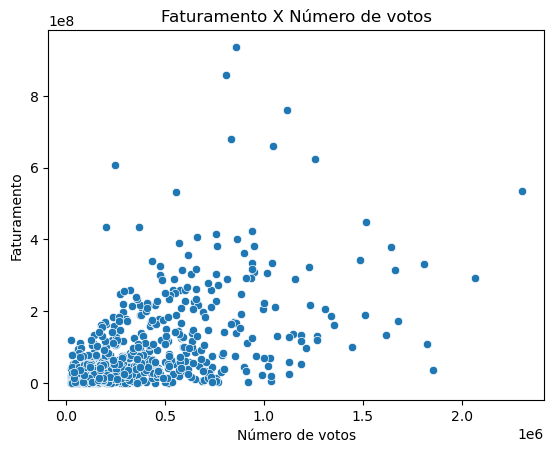

In [11]:
# Relação entre faturamento e votos
sns.scatterplot(x="No_of_Votes", y="Gross", data=df_imdb)
plt.title("Faturamento X Número de votos")
plt.ylabel('Faturamento')
plt.xlabel('Número de votos')

### ➡️ Observação: A maioria dos filmes concentra-se na faixa de baixo para médio faturamento e número de votos, formando uma “nuvem” densa no canto inferior esquerdo do gráfico.

Text(0.5, 0, 'Notas do IMDB')

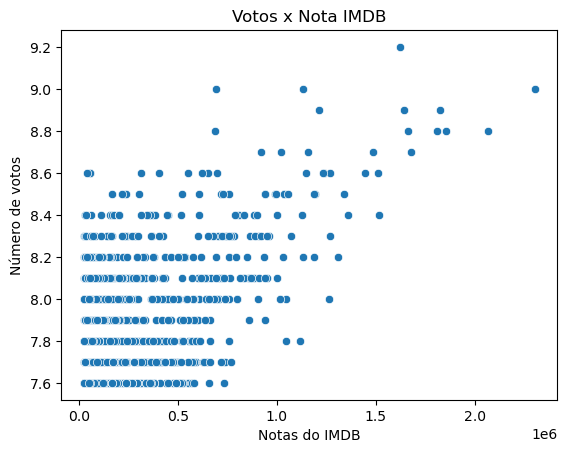

In [12]:
# Relação entre votos e nota IMDB
sns.scatterplot(x="No_of_Votes", y="IMDB_Rating", data=df_imdb)
plt.title("Votos x Nota IMDB")
plt.ylabel('Número de votos')
plt.xlabel('Notas do IMDB')

### ➡️  Insight: Filmes com mais votos tendem a ter notas variadas, mas geralmente há uma tendência de dispersão ampla. Filmes muito votados raramente possuem notas extremamente baixas, sugerindo que filmes amplamente assistidos/avaliados tendem à média/alta avaliação

## 7. [Análise temporal](#7)

Text(0.5, 1.0, 'Nota IMDB média por década')

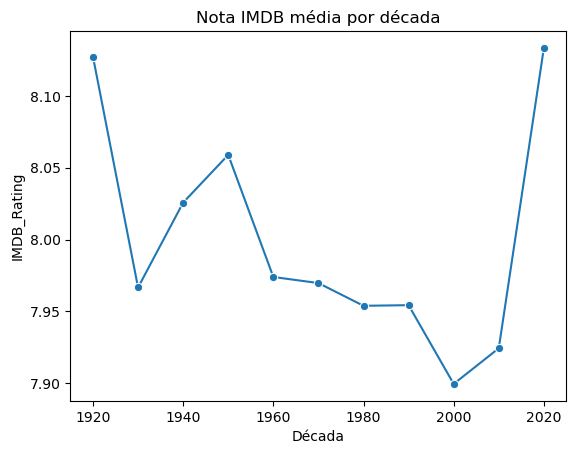

In [13]:
# Tendência de notas médias por década
df_imdb["Década"] = (df_imdb["Released_Year"] // 10) * 10
sns.lineplot(x="Década", y="IMDB_Rating", data=df_imdb, ci=None, marker="o")
plt.title("Nota IMDB média por década")

### ➡️  Insight: Existem oscilações ao longo dos anos, mas uma relativa estabilidade entre as décadas de 1950 a 2000, com leve queda por volta dos anos 2000 e uma alta acentuada na década mais recente 2020. Como hipótese o aumento da nota média em 2020 pode estar relacionado a um número menor de lançamentos recentes ou mudanças no perfil do público/votantes.

## 8. [Insights Texto (Overview)](#8)

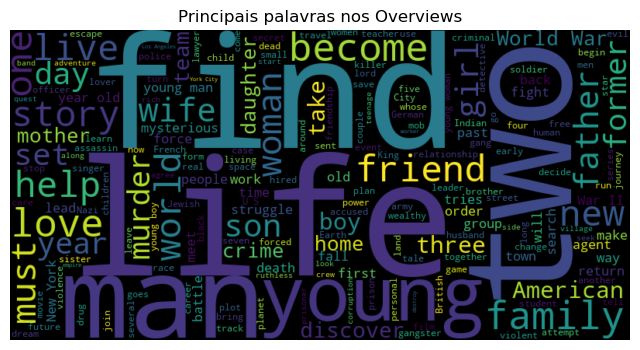

In [14]:
texto = " ".join(df_imdb["Overview"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(texto)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Principais palavras nos Overviews")
plt.show()

### ➡️  Insight: Palavras como “find”, “man”, “life”, “two”, “young”, “family”, “woman” dominam, indicando temas recorrentes sobre busca, relacionamentos, família, juventude e experiências humanas.

## 9. [Atores, Diretores e Gênero](#9)

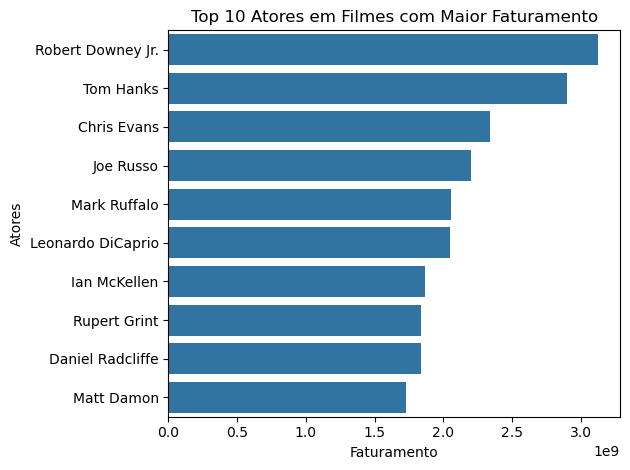

In [15]:
#  Agrupamento por atores com filmes com maior fauramento
top_atores = (
    df_imdb.melt(id_vars='Gross', value_vars=['Star1', 'Star2', 'Star3', 'Star4'], value_name='Actor')
    .groupby('Actor')['Gross']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=top_atores.values, y=top_atores.index)
plt.title('Top 10 Atores em Filmes com Maior Faturamento')
plt.ylabel('Atores')
plt.xlabel('Faturamento')
plt.tight_layout()

### ➡️  Insight: Robert Downey Jr. e Tom Hanks lideram, indicando tanto apelo do público quanto a escolha frequente destes atores para papéis de alto investimento

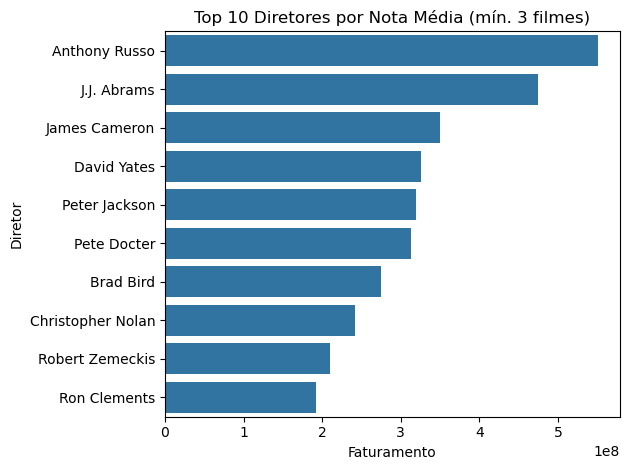

In [16]:
# Seleciona diretores com ao menos 3 filmes e calcula a nota média
top_diretores = (
    df_imdb.groupby('Director')
    .filter(lambda x: len(x) >= 3)
    .groupby('Director')['Gross']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=top_diretores.values, y=top_diretores.index)
plt.title('Top 10 Diretores por Nota Média (mín. 3 filmes)')
plt.xlabel('Faturamento')
plt.ylabel('Diretor')
plt.tight_layout()

### ➡️ Insight: Diretores que se destacam em média de faturamento tendem a trabalhar em grandes produções e franquias como: Anthony Russo e J.J. Abrams lideram, ambos conhecidos por comandar blockbusters e franquias (Marvel, Star Wars, Star Trek)

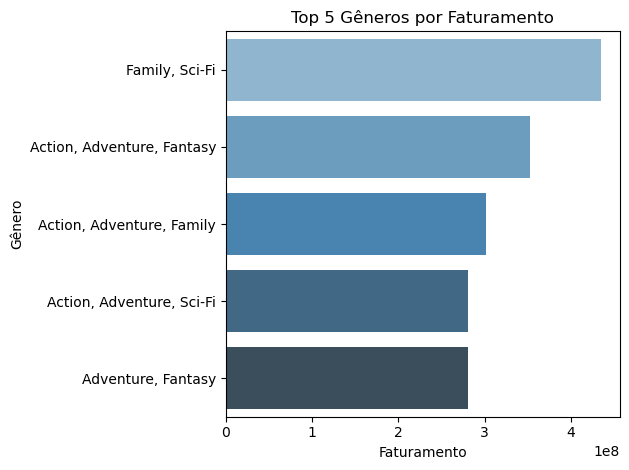

In [17]:
# Calcula nota média dos 5 gêneros 
top_generos = (
    df_imdb.groupby('Genre')['Gross']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

sns.barplot(x='Gross',y='Genre',data=top_generos,palette='Blues_d')
plt.title('Top 5 Gêneros por Faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Gênero')
plt.tight_layout()

### ➡️ Insight: Os gêneros com maior faturamento são aventuras familiares, ficção científica, fantasia e ação. Como hipótese as misturas como Family, Sci-Fi ou Action, Adventure, Fantasy dominam as bilheterias, mostrando que grandes produções tendem a combinar gêneros para atingir públicos diversos.

## 10. [Exportação dos dados tratados](#11)

In [18]:
# Salvar dataset limpo para usar na modelagem
df_imdb.to_csv("imdb_tratado.csv", index=False)
print("✅ Dataset tratado salvo imdb_tratado.csv")

✅ Dataset tratado salvo imdb_tratado.csv


## 11. [Respostas do Desafio- Passo 2](#11)

## <span style="color:green;">a. Qual filme você recomendaria para uma pessoa que você não conhece?</span>

In [19]:
# Recomendar o filme com maior nota e número de votos
recomendacao = df_imdb.nlargest(1, ['IMDB_Rating','No_of_Votes']).iloc[0]
print(f"Filme recomendado: {recomendacao.Series_Title} (Nota: {recomendacao.IMDB_Rating})")

Filme recomendado: The Godfather (Nota: 9.2)


### ✅ Resposta: O resultado mostra que, ao recomendar um filme para alguém sem conhecer suas preferências, o critério utilizado foi selecionar o título com maior nota IMDb e maior número de votos no dataset nesse caso, The Godfather (nota 9.2). “The Godfather” representa um consenso de qualidade cinematográfica global. Isso torna a indicação segura para qualquer pessoa, já que títulos com muitos votos e alta nota tendem a ser apreciados mesmo por diferentes perfis de público.

## <span style="color:green;">b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?</span>

In [20]:
# Mostrar correlações com Gross(Faturamento)
correlacao = df_imdb.corr(numeric_only=True)['Gross'].sort_values(ascending=False)
print(correlacao)

Gross            1.000000
No_of_Votes      0.589527
Released_Year    0.233270
Década           0.226899
Runtime          0.140002
IMDB_Rating      0.099393
Meta_score      -0.030480
Name: Gross, dtype: float64


### ✅ Resposta: Número de votos (No_of_Votes) tem a maior correlação positiva com o faturamento entre as variáveis analisadas (0.59), indicando que filmes com mais votos costumam faturar mais.

### Os principais fatores são:

### - Número de votos recebidos, que indica popularidade e está fortemente correlacionado com alto faturamento.

### - Ano de lançamento, sugerindo que produções mais recentes tendem a faturar mais, talvez devido a maior distribuição e marketing.

### - Duração do filme apresenta impacto positivo, porém menor.
### - Por outro lado, notas do IMDb e Meta Score possuem correlação fraca ou nula, mostrando que sucesso financeiro não depende diretamente das avaliações. Assim, popularidade e estratégia de lançamento são mais determinantes para o faturamento que qualidade avaliada por críticos e público.

## <span style="color:green;">c.	Quais insights podem ser tirados com a coluna Overview? 

In [21]:
stop_words = set(stopwords.words('english')) | {'movie','film','story','character','characters','one','two','also','series'}
lemmatizer = WordNetLemmatizer()
# retornar as top 5 palavras relevantes
def extracao_palavras(texts, top_n=5):
    """Recebe uma lista de textos e retorna as top_n palavras mais relevantes"""
    todo_texto = ' '.join(texts).lower()
    palavras = re.findall(r'\b\w+\b', todo_texto)
    filtrado = [lemmatizer.lemmatize(p) for p in palavras if p not in stop_words]
    return Counter(filtrado).most_common(top_n)

# Palavras mais comuns em todos os filmes
palavras_comuns = extracao_palavras(df_imdb['Overview'].dropna(), top_n=5)
print("Palavras mais frequentes em Overview:")
print(palavras_comuns)

Palavras mais frequentes em Overview:
[('life', 144), ('young', 132), ('man', 120), ('find', 101), ('world', 85)]


### ✅ Insight: As palavras mais recorrentes são ‘life’, ‘young’, ‘man’, ‘find’, e ‘world’ — termos amplos, sugestivos de temas universais. O padrão sugere uma predominância de narrativas sobre crescimento pessoal, desafios, explorações e o papel do indivíduo no mundo.

## <span style="color:green;"> - É possível inferir o gênero do filme a partir dessa coluna?</span>

In [22]:
palavras_por_genero = {}

for genero in df_imdb['Genre'].dropna().unique():
    textos = df_imdb[df_imdb['Genre'] == genero]['Overview'].dropna()
    palavras_por_genero[genero] = extracao_palavras(textos, top_n=5)

# Mostrar palavras mais comuns por gênero
for genero, palavras in palavras_por_genero.items():
    print(f"\nGênero: {genero}")
    print(palavras)


Gênero: Crime, Drama
[('life', 9), ('family', 6), ('young', 6), ('friend', 5), ('crime', 4)]

Gênero: Action, Crime, Drama
[('assassin', 6), ('family', 5), ('find', 5), ('drug', 5), ('police', 4)]

Gênero: Action, Adventure, Drama
[('world', 3), ('sauron', 3), ('help', 3), ('war', 3), ('lead', 2)]

Gênero: Biography, Drama, History
[('life', 9), ('king', 5), ('war', 4), ('ii', 3), ('first', 3)]

Gênero: Action, Adventure, Sci-Fi
[('must', 4), ('avenger', 3), ('apocalyptic', 3), ('try', 3), ('search', 3)]

Gênero: Drama
[('life', 20), ('man', 15), ('new', 14), ('father', 14), ('find', 13)]

Gênero: Drama, Romance
[('woman', 13), ('life', 12), ('love', 11), ('young', 11), ('man', 8)]

Gênero: Western
[('join', 3), ('bounty', 2), ('hunting', 1), ('scam', 1), ('men', 1)]

Gênero: Action, Sci-Fi
[('cyborg', 3), ('connor', 2), ('son', 2), ('sent', 2), ('beautiful', 1)]

Gênero: Biography, Crime, Drama
[('man', 5), ('life', 4), ('mob', 3), ('american', 3), ('frank', 3)]

Gênero: Action, Adve

### ✅ Resposta: Sim, é possível inferir o gênero do filme a partir das palavras mais comuns extraídas da coluna "Overview", conforme mostra. Essas listas mostram que certos termos são característicos e mais frequentes em determinados gêneros. Como: ‘war’ e ‘soldier’ aparecem no gênero Drama, War, enquanto ‘wormhole’ e ‘explorer’ em Adventure, Drama, Sci-Fi, evidenciando padrões ligados ao contexto de cada categoria.